# Lab 3 | NVIDIA

In [6]:
import pandas as pd

# Load the training dataset (downloaded file off Kaggle and manually uploaded)
url = "/content/sample_data/train.csv"
data = pd.read_csv(url)

# Focus on the 'LotArea' column
lot_area = data['LotArea']

# IQR calculation
Q1 = lot_area.quantile(0.25)
Q3 = lot_area.quantile(0.75)
IQR = Q3 - Q1
Tlower = Q1 - 1.5 * IQR
Tupper = Q3 + 1.5 * IQR

# Filter out outliers
lot_area_filtered = lot_area[(lot_area >= Tlower) & (lot_area <= Tupper)]

print(f"Original LotArea count: {len(lot_area)}")
print(f"Filtered LotArea count: {len(lot_area_filtered)}")
print(f"Number of outliers removed: {len(lot_area) - len(lot_area_filtered)}")


Original LotArea count: 1460
Filtered LotArea count: 1391
Number of outliers removed: 69


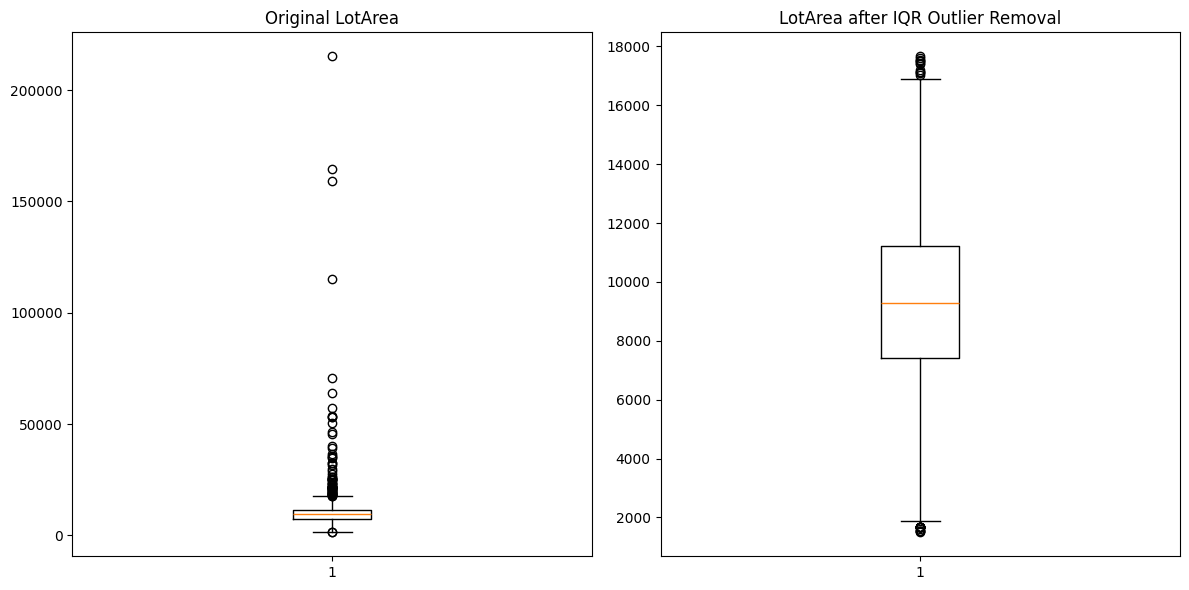

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Original data
plt.subplot(1,2,1)
plt.boxplot(lot_area, vert=True)
plt.title('Original LotArea')

# Filtered data
plt.subplot(1,2,2)
plt.boxplot(lot_area_filtered, vert=True)
plt.title('LotArea after IQR Outlier Removal')

plt.tight_layout()
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# RAW DATA MODEL
X_raw = data[['LotArea']]
y_raw = data['SalePrice']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)

model_raw = LinearRegression()
model_raw.fit(X_train_raw, y_train_raw)

y_pred_raw = model_raw.predict(X_test_raw)

mse_raw = mean_squared_error(y_test_raw, y_pred_raw)
r2_raw = r2_score(y_test_raw, y_pred_raw)

# FILTERED DATA MODEL
filtered_data = data[(data['LotArea'] >= Tlower) & (data['LotArea'] <= Tupper)]

X_filtered = filtered_data[['LotArea']]
y_filtered = filtered_data['SalePrice']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

model_filtered = LinearRegression()
model_filtered.fit(X_train_f, y_train_f)

y_pred_f = model_filtered.predict(X_test_f)

mse_filtered = mean_squared_error(y_test_f, y_pred_f)
r2_filtered = r2_score(y_test_f, y_pred_f)

# Results
print("RAW DATA MODEL")
print(f"R^2: {r2_raw:.4f}")
print(f"MSE: {mse_raw:.2f}")
print("-" * 40)
print("FILTERED DATA MODEL (IQR)")
print(f"R^2: {r2_filtered:.4f}")
print(f"MSE: {mse_filtered:.2f}")


RAW DATA MODEL
R^2: 0.0627
MSE: 7189094014.83
----------------------------------------
FILTERED DATA MODEL (IQR)
R^2: 0.1865
MSE: 4725084841.92


Removing outliers using the IQR method significantly improved the linear regression model performance. The R² score increased from 0.0627 to 0.1865 and MSE decreased substantially. This demonstrates that extreme values in LotArea were disproportionately influencing the regression line.